### Dependencies

In [1]:
import matplotlib as mpl
import matplotlib.lines as mlines
import matplotlib.pyplot as plt
from matplotlib.ticker import FormatStrFormatter

new_rc_paramas = {
    'text.usetex' : True,
    'figure.dpi' : 180,
    'text.latex.preamble' : r'\usepackage{libertine}'r'\usepackage{libertinust1math}',
    'font.family' : 'Linux Libertine',
    'axes.titlesize' : 22,
    'axes.labelsize' : 18,
    'xtick.labelsize' : 16,
    'ytick.labelsize' : 16,
    'xtick.direction' : 'in',
    'ytick.direction' : 'in',
    'xtick.top' : True,
    'ytick.right' : True,
    'legend.fontsize' : 'large',
    'axes.linewidth' : 1.2,
    'savefig.bbox' : 'tight',
    'image.aspect' : 'equal',
}

Oh2 = mlines.Line2D([], [], color='black', linestyle="-", label=r'$\mathcal{O}(h^2)$')
Oh3 = mlines.Line2D([], [], color='black', linestyle="-.", label=r'$\mathcal{O}(h^3)$')
Oh1 = mlines.Line2D([], [], color='black', linestyle="-", label=r'$\mathcal{O}(h)$')
Ohneg2 = mlines.Line2D([], [], color='black', linestyle="-", label=r'$\mathcal{O}(h^{-2})$')
Ohneg1 = mlines.Line2D([], [], color='black', linestyle="-", label=r'$\mathcal{O}(h^{-1})$')
Odt = mlines.Line2D([], [], color='black', linestyle="--", label=r'$\mathcal{O}(\Delta t)$')
Odt2 = mlines.Line2D([], [], color='black', linestyle="-", label=r'$\mathcal{O}(\Delta t^2)$')
tau1 = mlines.Line2D([], [], color='C4', linestyle="--", label=r'$\tau_0 = \tau_1 = 1$')
tau10neg4 = mlines.Line2D([], [], color='C0', linestyle="-", label=r'$\tau_0 = \tau_1 = 1\cdot 10^{-4}$')
tau10neg3 = mlines.Line2D([], [], color='C0', linestyle="-", label=r'$\tau_0 = \tau_1 = 1\cdot 10^{-3}$')
tau3x10neg3 = mlines.Line2D([], [], color='C0', linestyle="-", label=r'$\tau_0 = \tau_1 = 3\cdot 10^{-3}$')
tau5x10neg3 = mlines.Line2D([], [], color='C0', linestyle="-", label=r'$\tau_0 = \tau_1 = 5\cdot 10^{-3}$')
tau3x10neg4 = mlines.Line2D([], [], color='C2', linestyle="-.", label=r'$\tau_0 = \tau_1 = 3\cdot 10^{-4}$')
tau5x10neg4 = mlines.Line2D([], [], color='C3', linestyle=":", label=r'$\tau_0 = \tau_1 = 5\cdot 10^{-4}$')

conservative = mlines.Line2D([0], [0], marker='None', color='black', linestyle=":", label='Conservative')
classical = mlines.Line2D([0], [0], marker='None', color='black', linestyle=(0, (5,7)), label='Non-conservative')


space = mlines.Line2D([0], [0], marker='None', color='None', linestyle="None", label=' ')

circle = mlines.Line2D([0], [0], marker='o', color='black', 
                          markersize=9, markerfacecolor="None", 
                          linestyle="None", markeredgewidth=0.8,
                           label='Full stabilization.')
                          
star = mlines.Line2D([], [], color='black', marker='*',
                          markersize=9,linestyle="None",
                        markeredgewidth=0.8, markerfacecolor="None", 
                        label='Macro stabilization.')

triangle = mlines.Line2D([0], [0], marker='^', color='black', 
                          markersize=9, markerfacecolor="None", 
                          linestyle="None", markeredgewidth=0.8,
                           label='Macro stab. 2')


mpl.rcParams.update(new_rc_paramas)

import numpy as np

def convergence_rate(errors, mesh_sizes):
    if len(errors) < 2 or len(mesh_sizes) < 2 or len(errors) != len(mesh_sizes):
        raise ValueError("At least two errors and mesh sizes are required.")

    # Take logarithm of errors and mesh sizes
    log_errors = np.log(errors)
    log_mesh_sizes = np.log(mesh_sizes)

    # Compute differences between consecutive elements
    delta_errors = np.diff(log_errors)
    delta_mesh_sizes = np.diff(log_mesh_sizes)

    # Compute convergence rate
    convergence_rates = delta_errors / delta_mesh_sizes

    return convergence_rates


### Errors

[1.97732829 2.02695526 1.97372245 1.9827209 ]
[0.88191579 1.09848075 0.99145429 0.99513392]
[1.98162225 2.06167224]
[1.07959128 1.12655962]


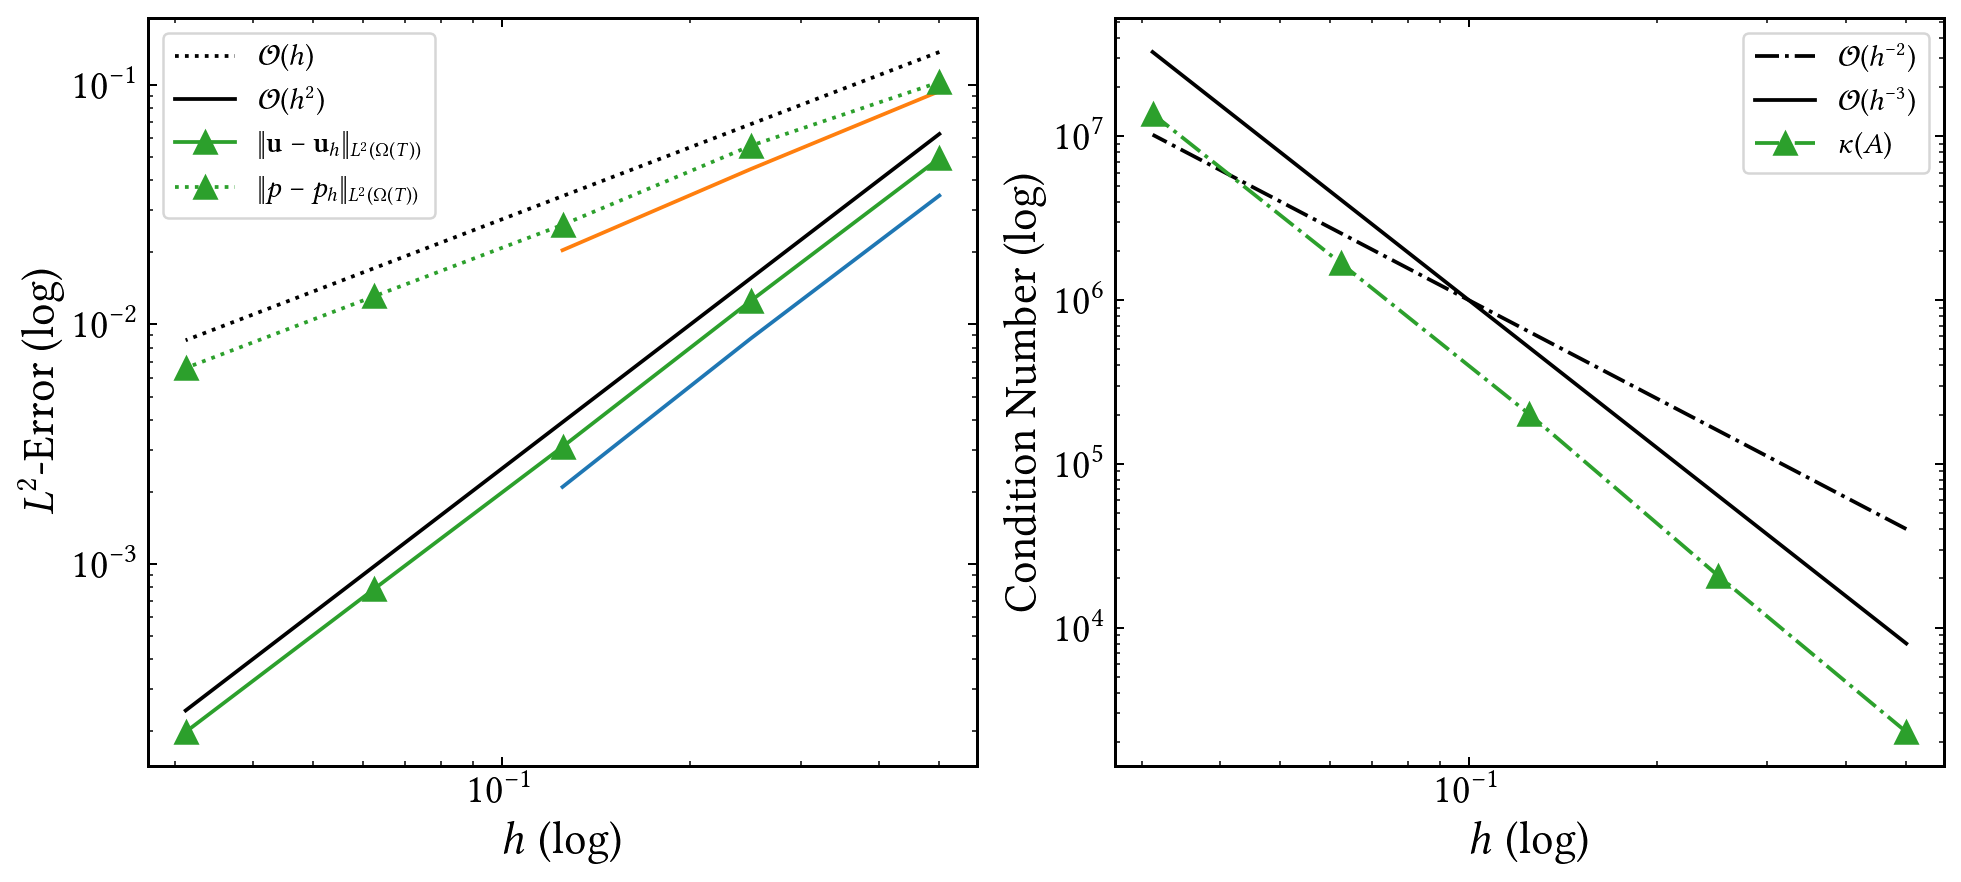

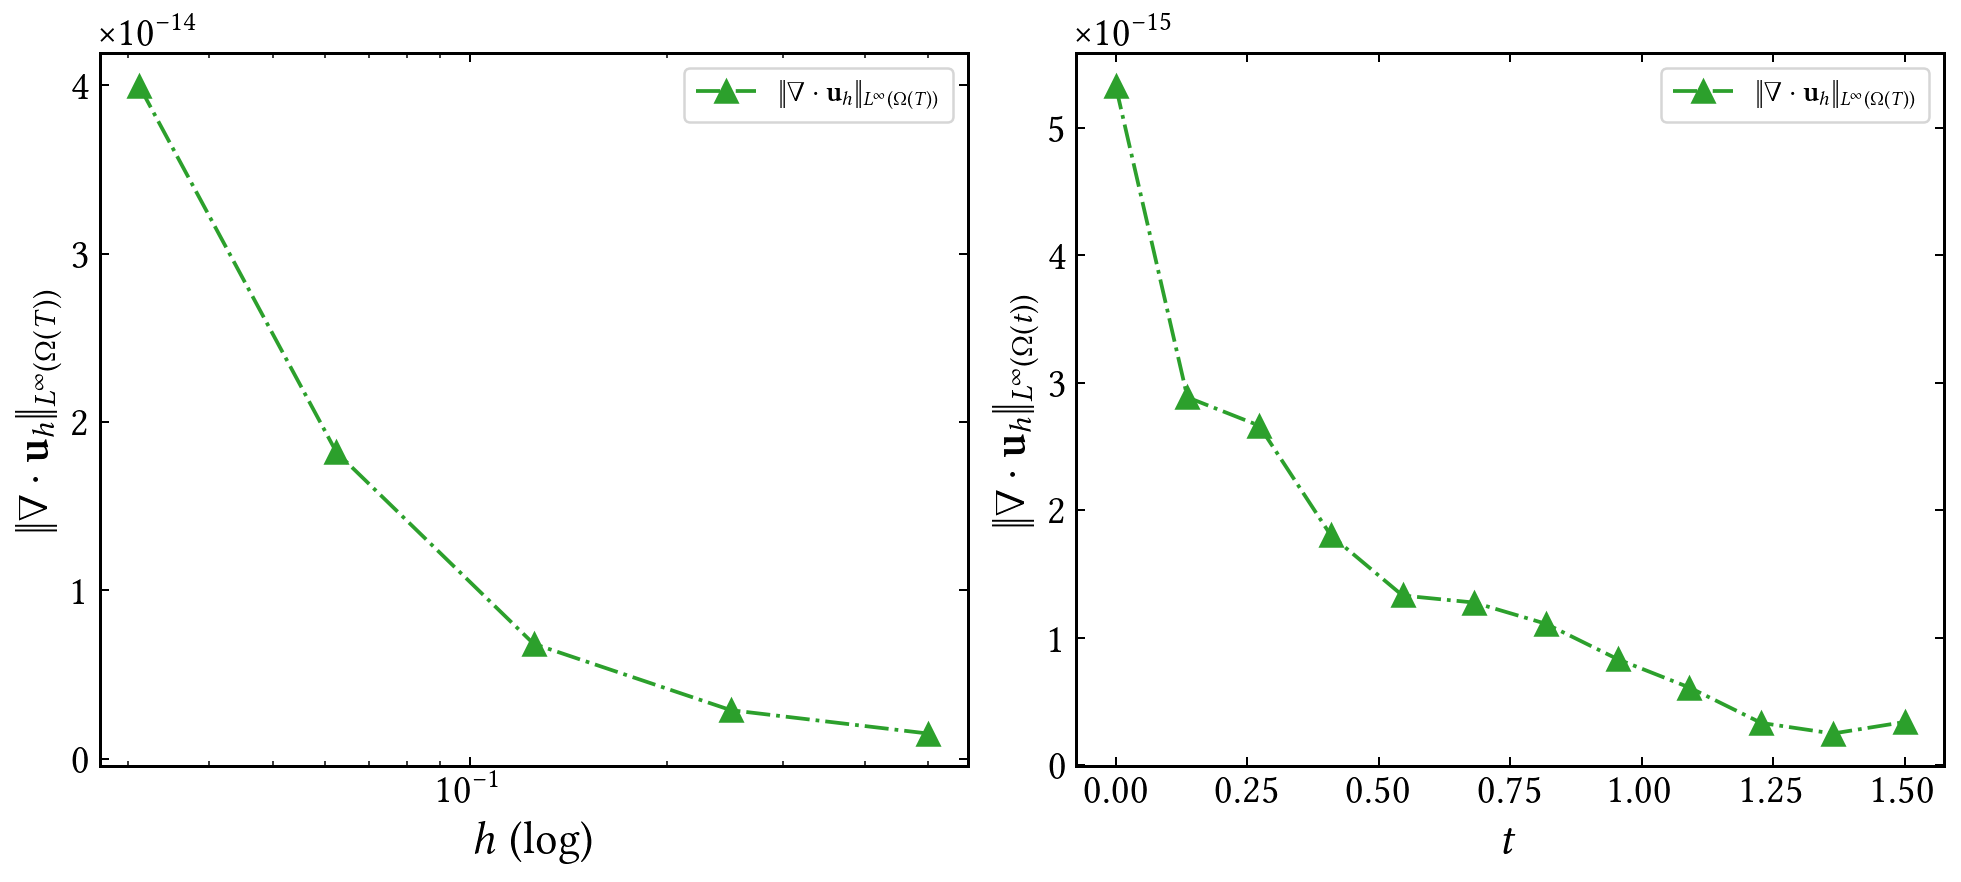

In [6]:
### mu = 1, rho = 1

# taylor hood
error_u = [0.008987112638515449, 0.002740411454831107, 0.0007657847574674886, 0.0002045013687960165]
error_p = [0.01577306552104151, 0.004797022003362399, 0.001603957532370062, 0.0005515429938837239]

# BDM1 x P0
error_u = [0.03347594978645296, 0.01096089888036042, 0.002587959860419136, 0.0006556431159321815]
error_p = [0.73799418337865, 0.4015002443236859, 0.1927156202476352, 0.09805440082414765]

# BDM1 x P0, lambda_boundary = 10, lambda_interior = 1, T = 0.5 (no symmetric term added like (u*n, q) on the boundary, because that destroys divergence!!)
error_u = [0.03323420430463687, 0.008832242643200948, 0.002194508929704938, 0.0005585701178453785]
error_p = [0.05852928792002348, 0.02928301558758096, 0.01354849097763893, 0.006809725406113611]
error_div = [1.471045507628332e-15, 1.804112415015879e-15, 4.6074255521944e-15, 1.06581410364015e-14]

condition_number = [2.308204e+03,2.080711e+04,2.008755e+05,1.676999e+06]

error_div_t = [5.32907e-15, 2.88658e-15, 2.66454e-15, 1.80411e-15, 1.33227e-15, 1.27676e-15, 1.11022e-15, 8.32667e-16, 6.10623e-16, 3.33067e-16, 2.498e-16, 3.40006e-16, ]

# rerunning with one extra mesh size but only to T=0.25
error_u = [0.04948944847425846, 0.01256832742652954, 0.003083920361862892, 0.0007851515546337311, 0.0001986529560484227]
error_p = [0.102893906025593, 0.05583500335020436, 0.02607539473823542, 0.01311515449362292, 0.006579732717677737]
error_div = [1.498801083243961e-15, 2.886579864025407e-15, 6.827871601444713e-15, 1.820765760385257e-14, 3.996802888650564e-14]

error_u_t = [0.03455893367299658, 0.008750494514558848, 0.002096077860082209]
error_p_t =  [0.09429491648167537, 0.04461685175568429, 0.02043481381098897]

condition_number = [2.307860e+03,2.080628e+04,2.008735e+05,1.676994e+06,1.373035e+07]

#h = [0.5, 0.25, 0.125, 0.0625]
h = [0.5, 0.25, 0.125, 0.0625, 0.03125]

t = np.linspace(0, 1.5, 12)

print(convergence_rate(error_u, h))
print(convergence_rate(error_p, h))
print(convergence_rate(error_u_t, h[:-2]))
print(convergence_rate(error_p_t, h[:-2]))

fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(11, 5))

ax1.loglog(h, 2.75e-1*np.power(h, 1),label=r"$\mathcal{O}(h)$", linestyle=":", color="black")   
ax1.loglog(h, 2.5e-1*np.power(h, 2),label=r"$\mathcal{O}(h^2)$", linestyle="-", color="black")   
ax1.loglog(h, error_u, label= r"$\|\mathbf{u}-\mathbf{u}_h\|_{L^2(\Omega(T))}$", marker='^', markersize=9, linestyle="-", color="C2")
ax1.loglog(h[:-2], error_u_t)
ax1.loglog(h[:-2], error_p_t)
ax1.loglog(h, error_p, label= r"$\|p-p_h\|_{L^2(\Omega(T))}$", marker='^', markersize=9, linestyle=":", color="C2")
ax1.set_xlabel(r"$h$ (log)")
ax1.tick_params(axis='both', which='major')
ax1.set_ylabel(r"$L^2$-Error (log)")
ax1.legend()

ax2.loglog(h, 1e4*np.power(h, -2),label=r"$\mathcal{O}(h^{-2})$", linestyle="-.", color="black")
ax2.loglog(h, 1e3*np.power(h, -3),label=r"$\mathcal{O}(h^{-3})$", linestyle="-", color="black")
ax2.loglog(h, condition_number, label= r"$\kappa(A)$", marker='^', markersize=9, linestyle="-.", color="C2")
ax2.set_xlabel(r"$h$ (log)")
ax2.tick_params(axis='both', which='major')
ax2.set_ylabel(r"Condition Number (log)")
ax2.legend()

fig.tight_layout()
plt.show()
#fig.savefig("L2_errors.pdf")


fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(11, 5))


ax1.semilogx(h, error_div, label= r"$\|\nabla\cdot\mathbf{u}_h\|_{L^{\infty}(\Omega(T))}$", marker='^', markersize=9, linestyle="-.", color="C2")
ax1.set_xlabel(r"$h$ (log)")
ax1.tick_params(axis='both', which='major')
ax1.set_ylabel(r"$\|\nabla\cdot\mathbf{u}_h\|_{L^{\infty}(\Omega(T))}$")
ax1.legend()


ax2.plot(t, error_div_t, label= r"$\|\nabla\cdot\mathbf{u}_h\|_{L^{\infty}(\Omega(T))}$", marker='^', markersize=9, linestyle="-.", color="C2")
ax2.set_xlabel(r"$t$")
ax2.tick_params(axis='both', which='major')
ax2.set_ylabel(r"$\|\nabla\cdot\mathbf{u}_h\|_{L^{\infty}(\Omega(t))}$")
ax2.legend()


fig.tight_layout()
plt.show()
#fig.savefig("divergence_errors.pdf")